In [1]:
# https://github.com/plaidml/plaidml
# https://informatics.sydney.edu.au/blogs/amdgpu/

# Install the plaidml backend
import plaidml.keras
plaidml.keras.install_backend()

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

INFO:plaidml:Opening device "opencl_amd_gfx902.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 16s 316us/step - loss: 2.0650 - acc: 0.2620 - val_loss: 1.9738 - val_acc: 0.2724
Epoch 2/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.8886 - acc: 0.3327 - val_loss: 1.9100 - val_acc: 0.3012
Epoch 3/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.8195 - acc: 0.3595 - val_loss: 1.8085 - val_acc: 0.3569
Epoch 4/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.7749 - acc: 0.3760 - val_loss: 1.8027 - val_acc: 0.3585
Epoch 5/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.7340 - acc: 0.3911 - val_loss: 1.7332 - val_acc: 0.3889
Epoch 6/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.7048 - acc: 0.4011 - val_loss: 1.7197 - val_acc: 0.3933
Epoch 7/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.6796 - acc: 0.4097 - val_loss: 1

50000/50000 [==============================] - 7s 142us/step - loss: 1.1778 - acc: 0.5894 - val_loss: 1.4958 - val_acc: 0.4905
Epoch 60/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1774 - acc: 0.5875 - val_loss: 1.3547 - val_acc: 0.5168
Epoch 61/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1653 - acc: 0.5919 - val_loss: 1.4421 - val_acc: 0.4952
Epoch 62/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1543 - acc: 0.5979 - val_loss: 1.4026 - val_acc: 0.5039
Epoch 63/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1501 - acc: 0.5990 - val_loss: 1.3339 - val_acc: 0.5284
Epoch 64/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1479 - acc: 0.5954 - val_loss: 1.3725 - val_acc: 0.5101
Epoch 65/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1408 - acc: 0.6006 - val_loss: 1.5095 - val_acc: 0.4697
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 145us/step - loss: 0.8760 - acc: 0.6953 - val_loss: 1.4009 - val_acc: 0.5305
Epoch 118/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.8643 - acc: 0.6992 - val_loss: 1.4004 - val_acc: 0.5265
Epoch 119/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.8663 - acc: 0.6997 - val_loss: 1.4672 - val_acc: 0.5140
Epoch 120/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.8570 - acc: 0.7036 - val_loss: 1.5594 - val_acc: 0.4888
Epoch 121/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.8537 - acc: 0.7062 - val_loss: 1.4964 - val_acc: 0.5098
Epoch 122/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.8466 - acc: 0.7077 - val_loss: 1.3746 - val_acc: 0.5282
Epoch 123/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.8340 - acc: 0.7117 - val_loss: 1.4737 - val_acc: 0.5201
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.5953 - acc: 0.7971 - val_loss: 1.5075 - val_acc: 0.5414
Epoch 176/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.5723 - acc: 0.8079 - val_loss: 1.7764 - val_acc: 0.5057
Epoch 177/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.5877 - acc: 0.8002 - val_loss: 1.7112 - val_acc: 0.5142
Epoch 178/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.5818 - acc: 0.8037 - val_loss: 2.0064 - val_acc: 0.4485
Epoch 179/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.5583 - acc: 0.8128 - val_loss: 1.6318 - val_acc: 0.5277
Epoch 180/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.5625 - acc: 0.8100 - val_loss: 1.5265 - val_acc: 0.5365
Epoch 181/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.5430 - acc: 0.8187 - val_loss: 1.7114 - val_acc: 0.5139
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 145us/step - loss: 0.3352 - acc: 0.8953 - val_loss: 1.8945 - val_acc: 0.5319
Epoch 234/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.3143 - acc: 0.9031 - val_loss: 1.9190 - val_acc: 0.5387
Epoch 235/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.3339 - acc: 0.8952 - val_loss: 1.8701 - val_acc: 0.5400
Epoch 236/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.2877 - acc: 0.9142 - val_loss: 2.0247 - val_acc: 0.5220
Epoch 237/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.3875 - acc: 0.8843 - val_loss: 1.9508 - val_acc: 0.5304
Epoch 238/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.3032 - acc: 0.9081 - val_loss: 2.0154 - val_acc: 0.5117
Epoch 239/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.2746 - acc: 0.9180 - val_loss: 2.0595 - val_acc: 0.5199
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 7s 149us/step - loss: 0.2588 - acc: 0.9336 - val_loss: 2.1936 - val_acc: 0.5378
Epoch 292/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.1748 - acc: 0.9554 - val_loss: 2.1579 - val_acc: 0.5468
Epoch 293/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1407 - acc: 0.9677 - val_loss: 2.1486 - val_acc: 0.5267
Epoch 294/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1044 - acc: 0.9798 - val_loss: 2.2130 - val_acc: 0.5414
Epoch 295/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1904 - acc: 0.9549 - val_loss: 2.2661 - val_acc: 0.5347
Epoch 296/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1492 - acc: 0.9650 - val_loss: 2.1729 - val_acc: 0.5514
Epoch 297/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.1175 - acc: 0.9734 - val_loss: 3.8778 - val_acc: 0.4184
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.0465 - acc: 0.9952 - val_loss: 2.4834 - val_acc: 0.5462
Epoch 350/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0420 - acc: 0.9955 - val_loss: 2.4719 - val_acc: 0.5464
Epoch 351/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0401 - acc: 0.9962 - val_loss: 2.5241 - val_acc: 0.5462
Epoch 352/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0389 - acc: 0.9959 - val_loss: 2.5417 - val_acc: 0.5466
Epoch 353/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0373 - acc: 0.9963 - val_loss: 2.5210 - val_acc: 0.5474
Epoch 354/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0387 - acc: 0.9959 - val_loss: 2.5350 - val_acc: 0.5481
Epoch 355/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0352 - acc: 0.9969 - val_loss: 2.6413 - val_acc: 0.5359
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 166us/step - loss: 0.0136 - acc: 0.9995 - val_loss: 2.9002 - val_acc: 0.5493
Epoch 408/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.0138 - acc: 0.9994 - val_loss: 2.9002 - val_acc: 0.5484
Epoch 409/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0133 - acc: 0.9995 - val_loss: 2.9320 - val_acc: 0.5457
Epoch 410/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0131 - acc: 0.9995 - val_loss: 2.9427 - val_acc: 0.5473
Epoch 411/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0133 - acc: 0.9995 - val_loss: 2.9478 - val_acc: 0.5437
Epoch 412/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0131 - acc: 0.9995 - val_loss: 2.9288 - val_acc: 0.5470
Epoch 413/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0126 - acc: 0.9996 - val_loss: 2.9283 - val_acc: 0.5476
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 8s 157us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.1701 - val_acc: 0.5461
Epoch 466/500
50000/50000 [==============================] - 8s 150us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.1699 - val_acc: 0.5468
Epoch 467/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.1787 - val_acc: 0.5466
Epoch 468/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.0070 - acc: 0.9999 - val_loss: 3.1770 - val_acc: 0.5470
Epoch 469/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.1966 - val_acc: 0.5452
Epoch 470/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.1933 - val_acc: 0.5486
Epoch 471/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 3.1936 - val_acc: 0.5457
Epoch 472/500
50000/50000 [

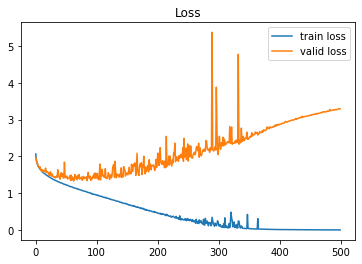

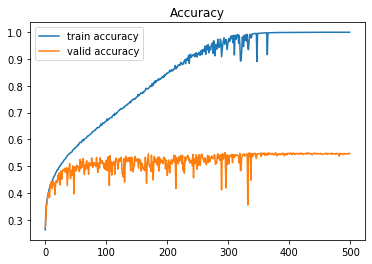

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()